# **Importing packages and analysis of Data**

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community

In [2]:
# Read the CSV file
df = pd.read_csv('/content/politicians_scraped_data.csv')
df=df.sample(n=300)
df.head(5)

st_name  pc_no    pc_name pc_type               cand_name  \
47697       Rajasthan      6     Jaipur     GEN            Shravan Soni   
5200   Andhra Pradesh     33    Ongole      GEN  Radhakrishna Somisetty   
55199   Uttar Pradesh     28   Faizabad     GEN       Ram Krishan Sinha   
45028          Punjab      4  Jalandhar     NaN     Jagjivan Ram Bharti   
1194   Andhra Pradesh     11      Eluru     GEN    Anaparti Prakasa Rao   

      cand_sex                     partyname partyabbre  
47697        M                   Independent        IND  
5200         M                           IND        IND  
55199        M  Indian National Congress (U)     INC(U)  
45028        M     Republican Party Of India        RPI  
1194         M                   Independent        IND

In [3]:
df.shape

(300, 8)

In [4]:
df.describe

<bound method NDFrame.describe of               st_name  pc_no    pc_name pc_type  \
47697       Rajasthan      6     Jaipur     GEN   
5200   Andhra Pradesh     33    Ongole      GEN   
55199   Uttar Pradesh     28   Faizabad     GEN   
45028          Punjab      4  Jalandhar     NaN   
1194   Andhra Pradesh     11      Eluru     GEN   
...               ...    ...        ...     ...   
34506     Maharashtra     25     Chimur     GEN   
26497          Kerala      2  Cannanore     GEN   
64093   Uttar Pradesh     81    Baghpat     GEN   
22451       Karnataka      6  Davangere     GEN   
8626            Bihar     36      Arrah     GEN   

                            cand_name cand_sex  \
47697                    Shravan Soni        M   
5200           Radhakrishna Somisetty        M   
55199               Ram Krishan Sinha        M   
45028             Jagjivan Ram Bharti        M   
1194             Anaparti Prakasa Rao        M   
...                               ...      ...   
345

In [5]:
df.isna().sum()

st_name        0
pc_no          0
pc_name        0
pc_type       28
cand_name      0
cand_sex       2
partyname      0
partyabbre     0
dtype: int64

In [6]:
df.dtypes

st_name       object
pc_no          int64
pc_name       object
pc_type       object
cand_name     object
cand_sex      object
partyname     object
partyabbre    object
dtype: object

In [7]:
df=df.drop(['pc_no','pc_name','pc_type','cand_sex'], axis=1)
df.isna().sum()

st_name       0
cand_name     0
partyname     0
partyabbre    0
dtype: int64

# **Creating graph and adding nodes and edges**

In [8]:
# Create an empty undirected graph
graph = nx.Graph()

In [9]:
# Add nodes to the graph for politicians
for _, row in df.iterrows():
    name = row['cand_name']
    party = row['partyabbre']
    state = row['st_name']
    graph.add_node(name, party=party, state=state)

In [10]:
# Add edges to the graph based on party affiliations
for _, row in df.iterrows():
    name = row['cand_name']
    party = row['partyabbre']
    state = row['st_name']

    # Find other politicians from the same party in the same state
    party_state_df = df[(df['partyabbre'] == party) & (df['st_name'] == state)]

    # Add edges between the current politician and others from the same party
    for _, party_state_row in party_state_df.iterrows():
        party_state_name = party_state_row['cand_name']
        if name != party_state_name:
            graph.add_edge(name, party_state_name)

# **Plotting the graph**

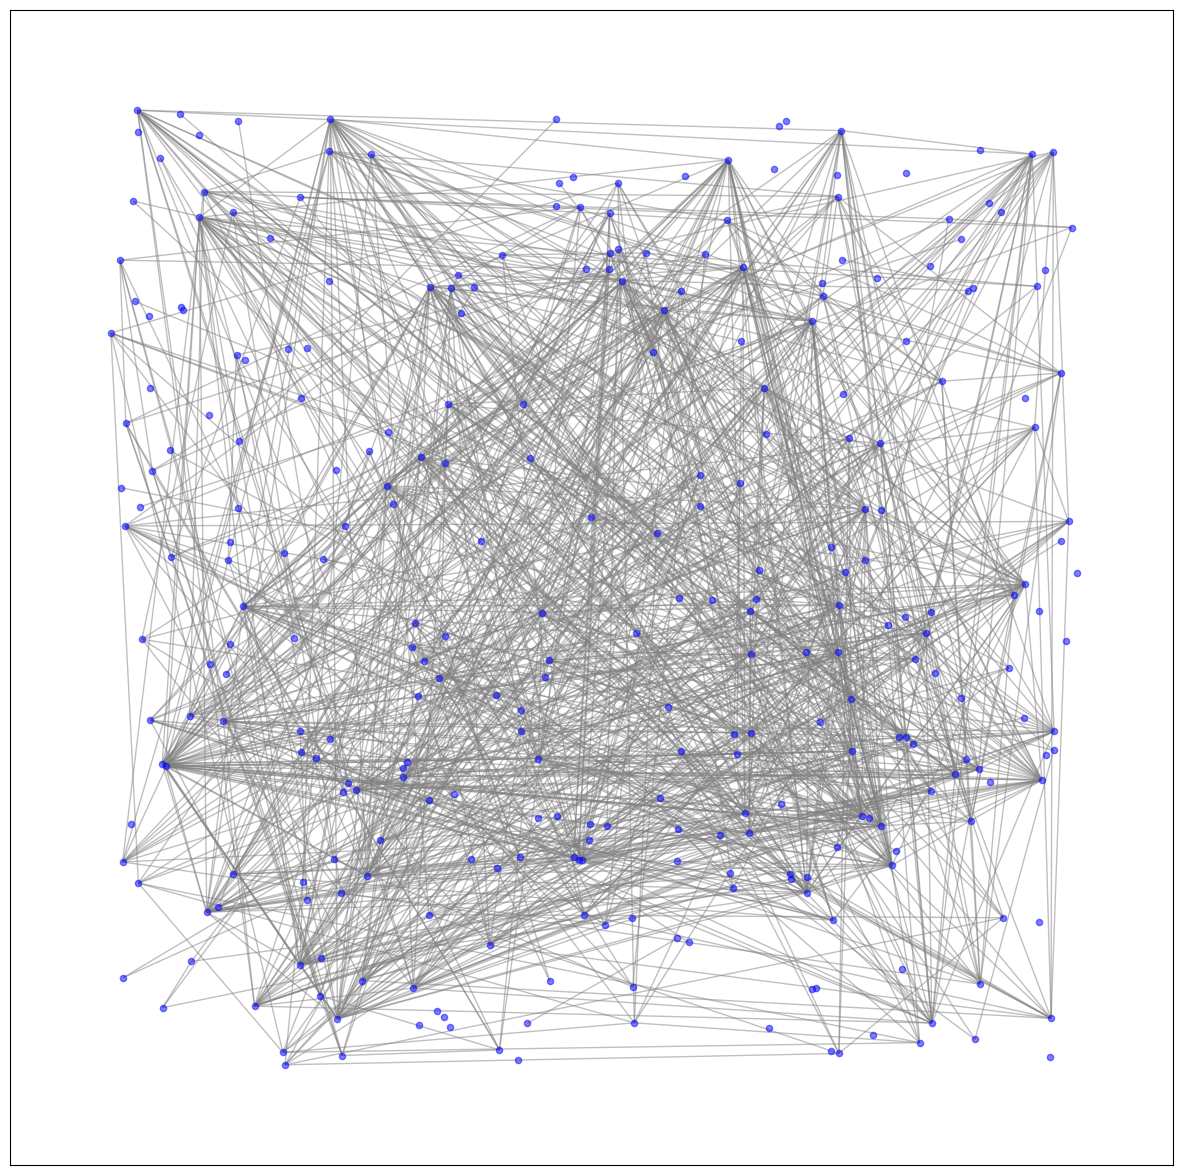

In [11]:
pos = nx.random_layout(graph)
plt.figure(figsize=(15,15))
nx.draw_networkx(graph, node_size=20, pos=pos, with_labels=False, node_color='blue', edge_color='gray',alpha=0.5)

# **Centrality Analysis**

## **Degree Centrality**

In [12]:
degree_centrality = nx.degree_centrality(graph)
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)
highest_degree_node = sorted_nodes[0]
print("\n\n10 most Influential nodes for Degree Centrality:\n")
for i in range(10):
  print(sorted_nodes[i])

print("\n\nHighest degree central node:\n", highest_degree_node)



10 most Influential nodes for Degree Centrality:

Shashidhar Narain Urf Shyam Pandit
Baboo Lal
Paras Nath Singh
Arun Kumar
Shakil
Vijay Pal Singh
Manjesh
Naseem Qureshi
Brizlal Nishad
Mohmad Anwar


Highest degree central node:
 Shashidhar Narain Urf Shyam Pandit


## **Betweennes Centrality**

In [13]:
betweenness_centrality = nx.betweenness_centrality(graph)
sorted_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)
highest_betweenness_node = sorted_nodes[0]
print("\n\n10 most Influential Nodes for Betweennes Centrality:\n")
for i in range(10):
  print(sorted_nodes[i])


print("\nHighest betweenness central node:\n", highest_betweenness_node)



10 most Influential Nodes for Betweennes Centrality:

Om Prakash
Shravan Soni
Radhakrishna Somisetty
Ram Krishan Sinha
Jagjivan Ram Bharti
Anaparti Prakasa Rao
Hoshiar Singh
Vindeshwari Gope
Gusain Singh
Balu Yashwant Chougule

Highest betweenness central node:
 Om Prakash


## **Eigenvector centrality**

In [14]:
eigenvector_centrality = nx.eigenvector_centrality(graph)
sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)
highest_eigen_node = sorted_nodes[0]
print("\n\n10 most Influential Nodes for Eigenvector Centrality:\n")
for i in range(10):
  print(sorted_nodes[i])


print("\nHighest Eigenvector central node:\n", highest_eigen_node)



10 most Influential Nodes for Eigenvector Centrality:

Shashidhar Narain Urf Shyam Pandit
Baboo Lal
Paras Nath Singh
Arun Kumar
Shakil
Vijay Pal Singh
Manjesh
Naseem Qureshi
Brizlal Nishad
Mohmad Anwar

Highest Eigenvector central node:
 Shashidhar Narain Urf Shyam Pandit


## **Page Rank**

In [15]:
pagerank = nx.pagerank(graph)
sorted_nodes = sorted(pagerank, key=pagerank.get, reverse=True)
highest_pagerank=sorted_nodes[0]
print("10 most Influential Nodes for Page Rank:\n")
for i in range(10):
  print(sorted_nodes[i])

10 most Influential Nodes for Page Rank:

Om Prakash
Shravan Soni
Duli Chand
Gordhan
Mala Ram
Shabir Khan
Radhakrishna Somisetty
Anaparti Prakasa Rao
Hoshiar Singh
Gusain Singh


# **Plotting The Highest Central Politicians**

{'Om Prakash': Text(0.33958745, 0.5487869, 'Om Prakash')}

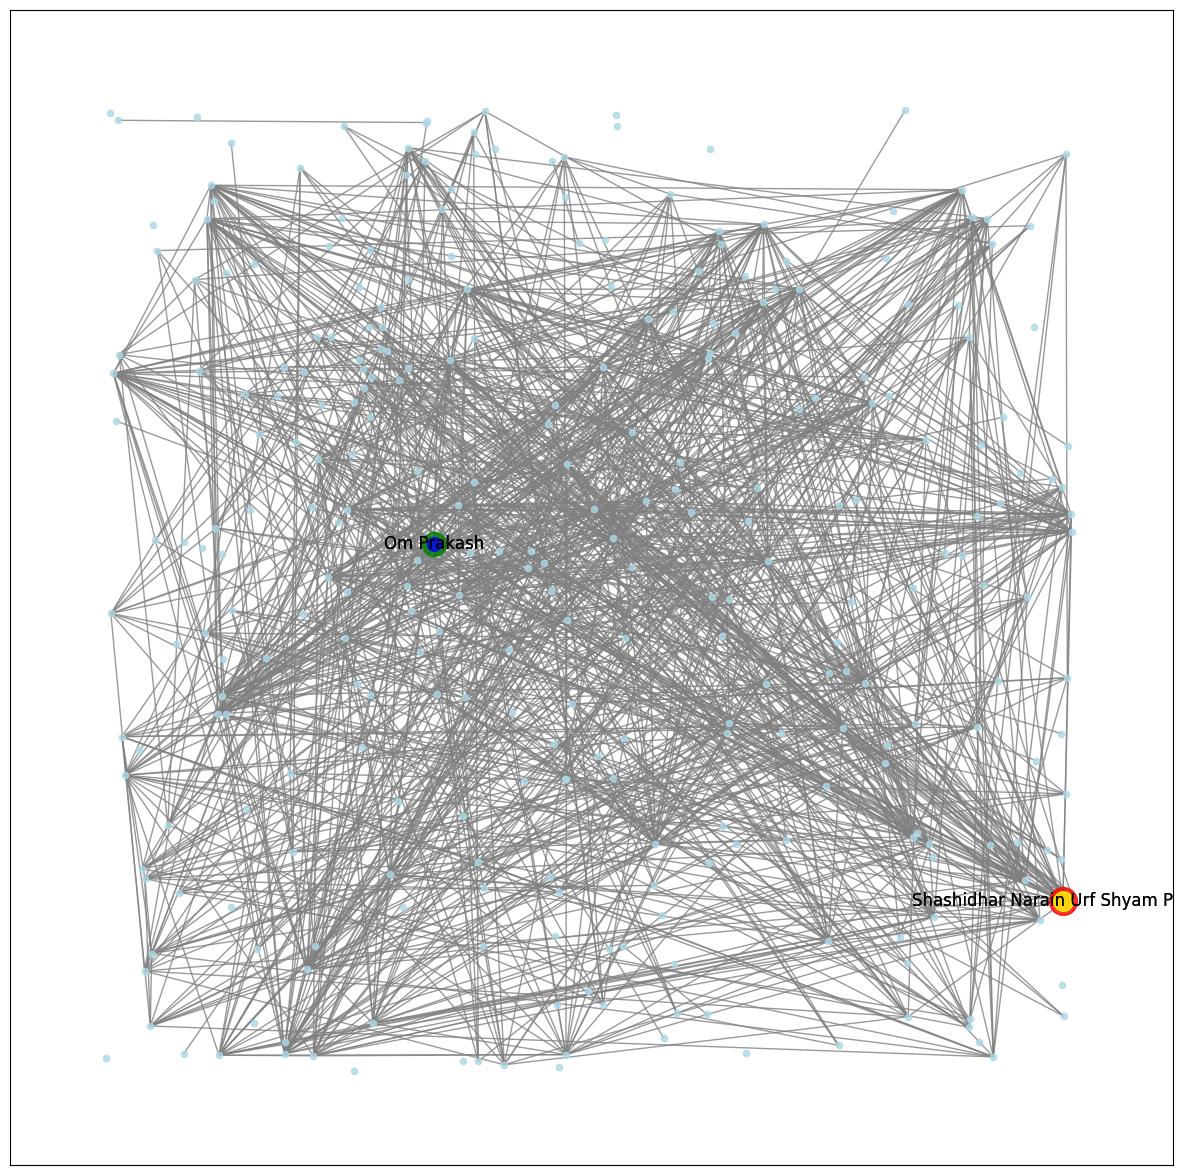

In [16]:
pos = nx.random_layout(graph)
plt.figure(figsize=(15,15))
nx.draw_networkx(graph, node_size=20, pos=pos, with_labels=False, node_color='lightblue', edge_color='gray',alpha=0.8)

nx.draw_networkx_nodes(graph, nodelist=[highest_degree_node], node_size=400, pos=pos, node_color='red',alpha=0.8)
nx.draw_networkx_labels(graph, pos=pos, labels={highest_degree_node: highest_degree_node}, font_color='black')

nx.draw_networkx_nodes(graph, nodelist=[highest_betweenness_node], node_size=300, pos=pos, node_color='green',alpha=0.8)
nx.draw_networkx_labels(graph, pos=pos, labels={highest_betweenness_node: highest_betweenness_node}, font_color='black')

nx.draw_networkx_nodes(graph, nodelist=[highest_eigen_node], node_size=200, pos=pos, node_color='yellow',alpha=0.8)
nx.draw_networkx_labels(graph, pos=pos, labels={highest_eigen_node: highest_eigen_node}, font_color='black')

nx.draw_networkx_nodes(graph, nodelist=[highest_pagerank], node_size=100, pos=pos, node_color='blue',alpha=0.8)
nx.draw_networkx_labels(graph, pos=pos, labels={highest_pagerank: highest_pagerank}, font_color='black')

# **Result Of Centrality Analysis**

In [17]:
print("\t\t\t\t\t\t Result From Centrality Measure")

print("\n\nHighest degree central node:\n", highest_degree_node)
print("\nHighest betweenness central node:\n", highest_betweenness_node)
print("\nHighest eigen central node:\n", highest_eigen_node)
print("\nHighest  pageranked node:\n", highest_pagerank)

						 Result From Centrality Measure


Highest degree central node:
 Shashidhar Narain Urf Shyam Pandit

Highest betweenness central node:
 Om Prakash

Highest eigen central node:
 Shashidhar Narain Urf Shyam Pandit

Highest  pageranked node:
 Om Prakash


# **Detecting Communites in the Network**

## **Using Girvan Newman Algorithm**

In [18]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)
    print("Number of connected components:", sg_count)
    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)
    return sg

Number of connected components: 131


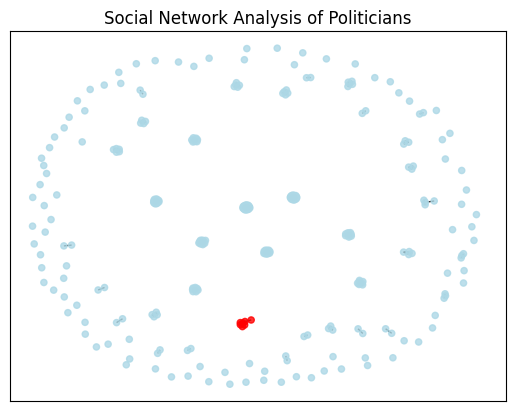

In [19]:
c = girvan_newman(graph.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

color_map = []
for node in graph:
    if node in node_groups[0]:
        color_map.append('red')
    else:
        color_map.append('lightblue')
largestcommunity=node_groups[0][0]

pos = nx.spring_layout(graph)
nx.draw_networkx(graph, node_size=20, pos=pos, with_labels=False, node_color=color_map, edge_color='black',alpha=0.8)

plt.title("Social Network Analysis of Politicians")
plt.show()

## **Using Greedy Modularity Algorithm**

In [20]:
import networkx.algorithms.community as nx_comm

import community.community_louvain as community_louvain

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

list_community_sets_greedy = list(nx_comm.greedy_modularity_communities(graph))

#Printing the First 20 Communities
for i in list_community_sets_greedy:
  print(i,"\n")

frozenset({'Durgesh Kumar', 'Jawahar Lal', 'Mohmad Anwar', 'Badam', 'Om Kar Nath', 'Jameer Ahmad', 'Shakil', 'Brizlal Nishad', 'Vijay Pal Singh', 'Kailash Singh', 'Ram Abhilakh', 'Lakhan Singh', 'Arun Kumar', 'Mihilal', 'Dilvar Singh Rawat', 'Jadunandan', 'Jagdish Goyal', 'Ghaseetey Khan', 'Paras Nath Singh', 'Shashidhar Narain Urf Shyam Pandit', 'Vijay Pal', 'Bhoopal Singh', 'Sunil Kumar Rana', 'Ram Saran', 'Naseem Qureshi', 'Kailash Nath Misra', 'Manjesh', 'Damodar Singh', 'Baboo Lal', 'Om Prakash Gupta', 'Kamla Devi Kashyap'}) 

frozenset({'Vijay Oraon', 'Ravindra Chaudhary', 'Purendra Sharma', 'Bengali Prasad Ram', 'Prabhat Kumar', 'Devender Kumar Singh', 'Chandrashekhar Singh Alias Chandrashekhar Prasad Yadav', 'Jay Sekhar Manjhi', 'Banarsi Devi', 'Yogendra Pd. Narain Singh', 'Ran Vijay Singh', 'Ram Krishan Rishi Dev', 'Anirudh Singh', 'Manisha Anand', 'Rajesh Kumar Ram', 'Rizwan', 'Vindeshwari Gope', 'Sheodeni Singh', 'Dileep Kumar', 'Viveka Nand Jha', 'Mahakal Rekha'}) 

frozens

In [21]:
partition_greedy = {}
for i, comm in enumerate(list_community_sets_greedy):
    print("Community:", i)
    print("Number of elems",len(comm))
    for n in comm:
        partition_greedy[n]=i

Community: 0
Number of elems 31
Community: 1
Number of elems 21
Community: 2
Number of elems 14
Community: 3
Number of elems 13
Community: 4
Number of elems 11
Community: 5
Number of elems 9
Community: 6
Number of elems 8
Community: 7
Number of elems 8
Community: 8
Number of elems 7
Community: 9
Number of elems 7
Community: 10
Number of elems 5
Community: 11
Number of elems 5
Community: 12
Number of elems 5
Community: 13
Number of elems 5
Community: 14
Number of elems 4
Community: 15
Number of elems 4
Community: 16
Number of elems 4
Community: 17
Number of elems 3
Community: 18
Number of elems 3
Community: 19
Number of elems 3
Community: 20
Number of elems 2
Community: 21
Number of elems 2
Community: 22
Number of elems 2
Community: 23
Number of elems 2
Community: 24
Number of elems 2
Community: 25
Number of elems 2
Community: 26
Number of elems 2
Community: 27
Number of elems 2
Community: 28
Number of elems 2
Community: 29
Number of elems 2
Community: 30
Number of elems 2
Community: 31

<ipython-input-22-cff9bc414124>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', max(partition_greedy.values()) + 1)


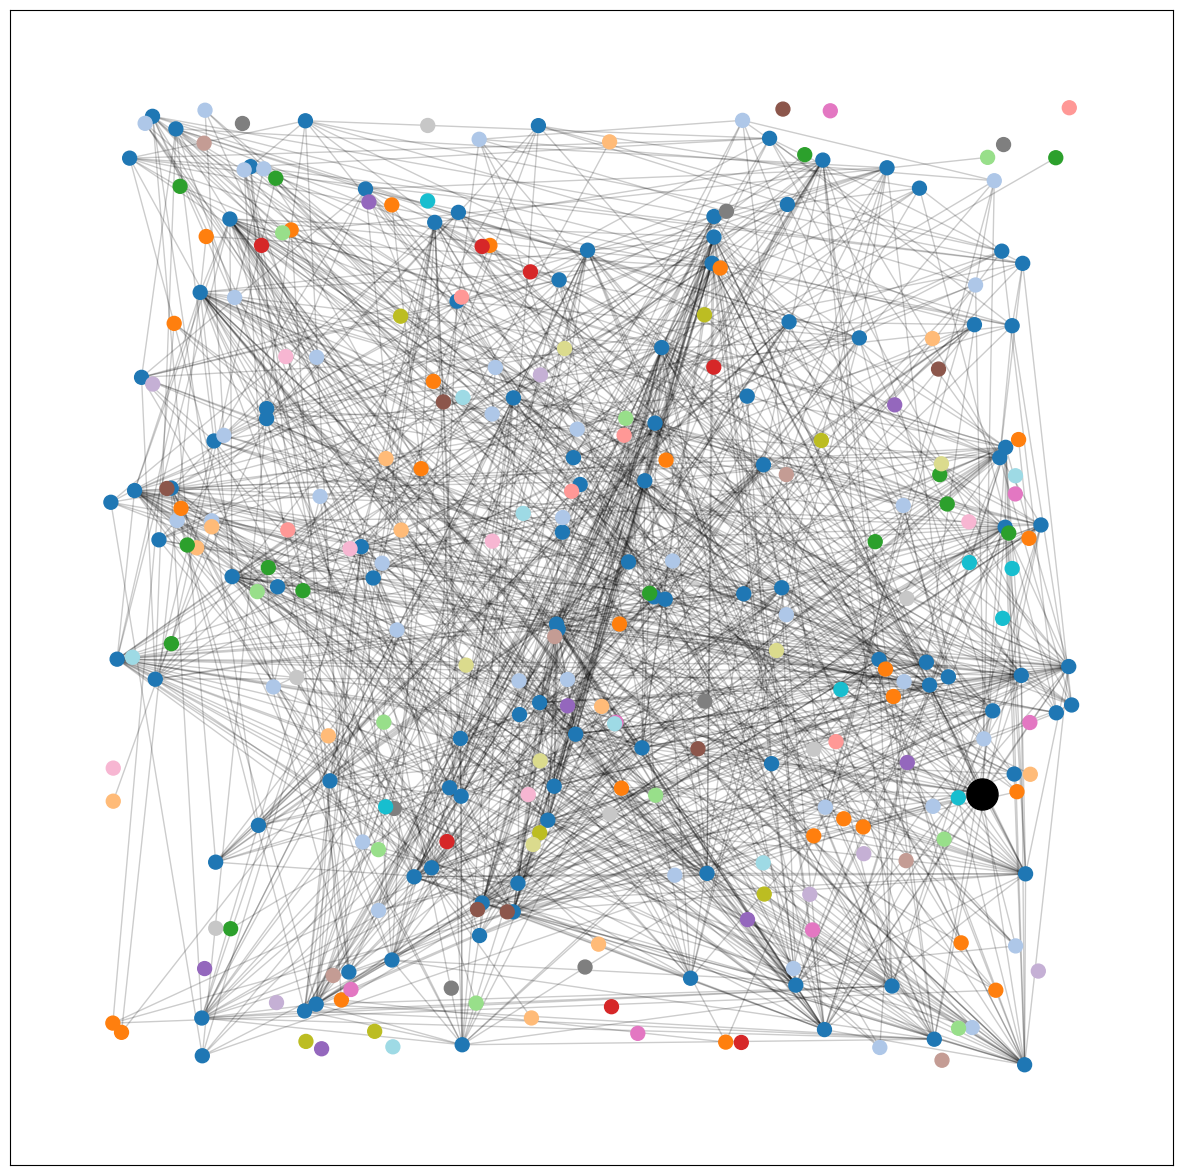

In [22]:
pos = nx.random_layout(graph)
# color the nodes according to their partition
cmap = cm.get_cmap('tab20', max(partition_greedy.values()) + 1)
plt.figure(figsize=(15,15))

nx.draw_networkx_nodes(graph, pos, partition_greedy.keys(), node_size=100,
                       cmap=cmap, node_color=list(partition_greedy.values()))
nx.draw_networkx_nodes(graph, pos, [list(partition_greedy.keys())[0]], node_size=500,node_color="black")
nx.draw_networkx_edges(graph, pos, alpha=0.2)

plt.show()

## **Using Louvain Community Detection Algorithm**

In [23]:
partition_library = community_louvain.best_partition(graph)

print(list(partition_library.items())[0:20])

[('Shravan Soni', 0), ('Radhakrishna Somisetty', 8), ('Ram Krishan Sinha', 2), ('Jagjivan Ram Bharti', 3), ('Anaparti Prakasa Rao', 8), ('Hoshiar Singh', 5), ('Vindeshwari Gope', 84), ('Gusain Singh', 58), ('Balu Yashwant Chougule', 65), ('G.C. Bayya Reddy', 9), ('Ramjilal Meena', 10), ('Suresh Hiraman Ingale', 121), ('Amelesh Misra', 12), ('Wasnik Mukul Balkrishna', 13), ('Kulamani Sahoo', 115), ('Dr Md. Salimuddin', 15), ('Gadadhar Saha', 16), ('Daxesh Pandya', 17), ('Jaswant Raj Jain', 18), ('A. P. Ahamed', 19)]


<ipython-input-24-b9e8cede0dc7>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', max(partition_library.values()) + 1)


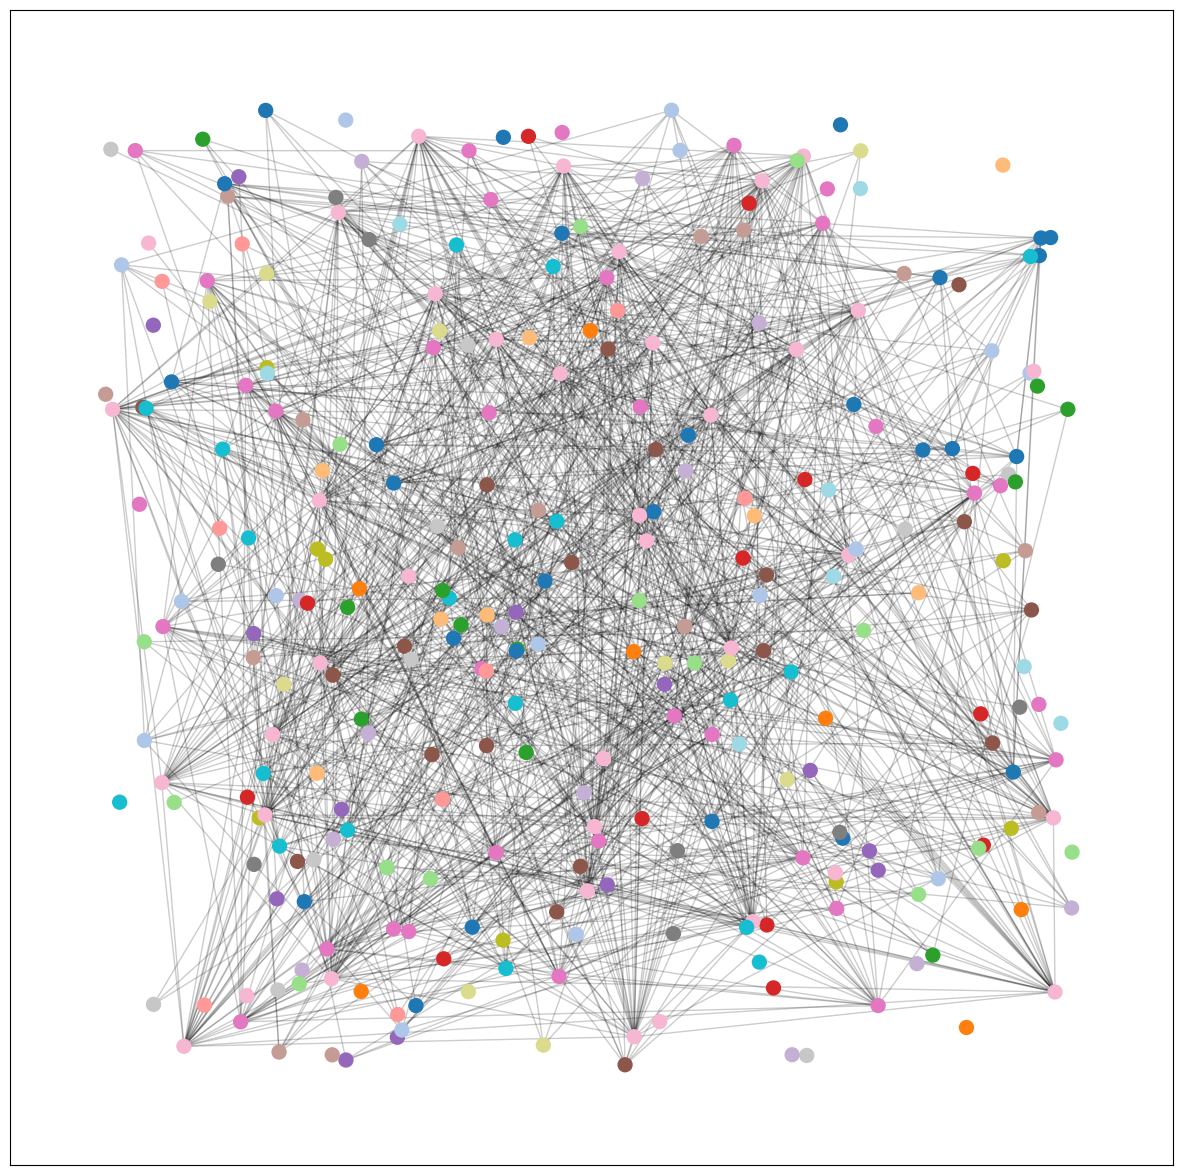

In [24]:
# Plotting the Graph

pos = nx.random_layout(graph)
# color the nodes according to their partition
cmap = cm.get_cmap('tab20', max(partition_library.values()) + 1)
plt.figure(figsize=(15,15))

nx.draw_networkx_nodes(graph, pos, partition_library.keys(), node_size=100,
                       cmap=cmap, node_color=list(partition_library.values()))
nx.draw_networkx_edges(graph, pos, alpha=0.2)

plt.show()

In [25]:
comms = set(partition_library.values())
print("Total No of Communities: "+str(len(comms)))

Total No of Communities: 131


In [26]:
list_community_sets_library = [ set() for i in range(len(comms)) ]

for n, comm in partition_library.items():
    list_community_sets_library[comm].add(n)

pairs = []
for i, nod in enumerate(list_community_sets_library):
    print(i,len(nod))
    comm_size = (i,len(nod))
    pairs.append(comm_size)

0 7
1 14
2 1
3 1
4 1
5 2
6 1
7 1
8 9
9 1
10 1
11 1
12 2
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 3
26 1
27 1
28 1
29 5
30 1
31 1
32 1
33 4
34 1
35 1
36 1
37 5
38 2
39 3
40 1
41 2
42 1
43 1
44 1
45 4
46 1
47 3
48 1
49 1
50 2
51 1
52 1
53 2
54 1
55 1
56 5
57 1
58 2
59 1
60 1
61 8
62 1
63 1
64 1
65 11
66 1
67 2
68 1
69 1
70 1
71 2
72 1
73 8
74 1
75 1
76 2
77 1
78 1
79 2
80 1
81 7
82 1
83 1
84 21
85 1
86 1
87 2
88 1
89 31
90 2
91 1
92 2
93 1
94 1
95 1
96 1
97 1
98 1
99 1
100 1
101 1
102 2
103 4
104 1
105 1
106 1
107 1
108 2
109 1
110 1
111 1
112 1
113 1
114 1
115 5
116 1
117 1
118 1
119 1
120 1
121 13
122 1
123 1
124 1
125 1
126 1
127 1
128 2
129 1
130 1


Text(0, 0.5, 'Number of nodes')

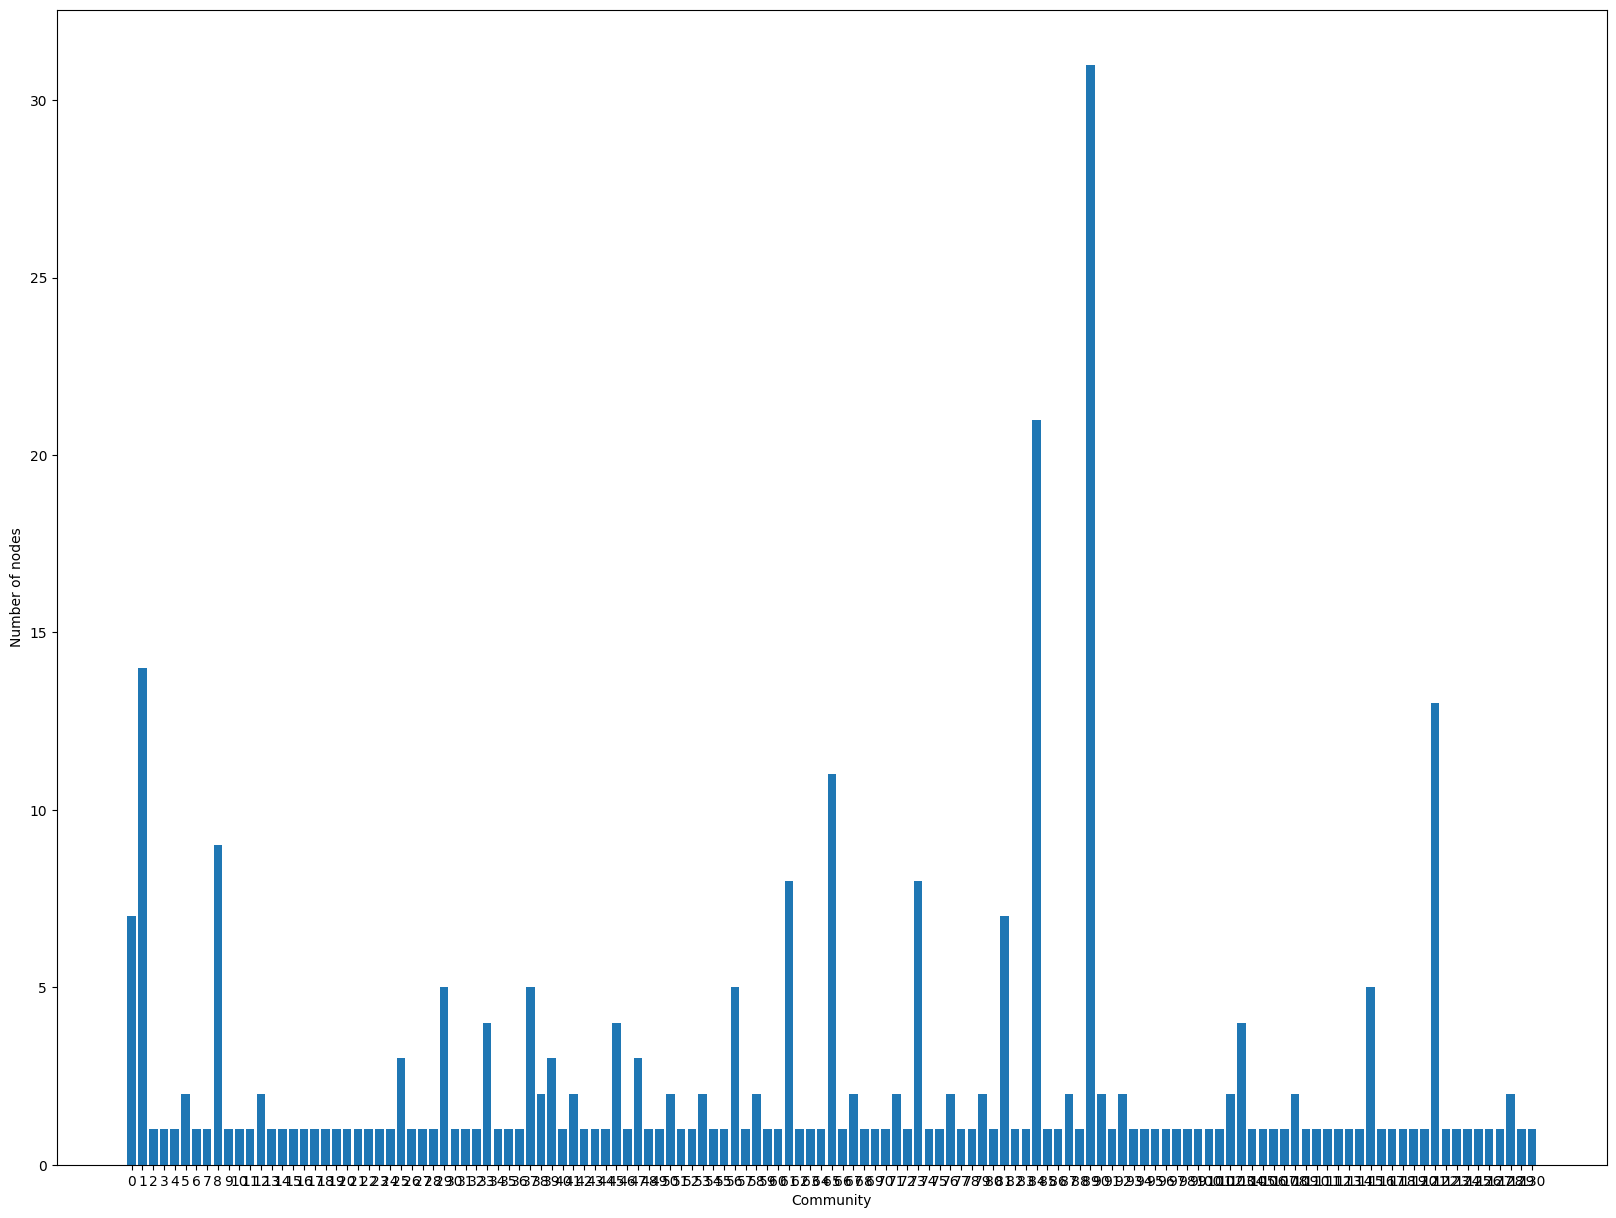

In [27]:
community_index = []
number_of_nodes = []

for comm, n_nodes in pairs:
    community_index.append(str(comm))
    number_of_nodes.append(n_nodes)
plt.figure(figsize=(20,15))
plt.bar(community_index,number_of_nodes)
plt.xlabel("Community")
plt.ylabel("Number of nodes")

In [28]:
max_value = max(number_of_nodes)
max_index = number_of_nodes.index(max_value)
print(max_index)
print(max_value)


89
31


<ipython-input-29-fac4d763abe9>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', max(partition_library.values()) + 1)


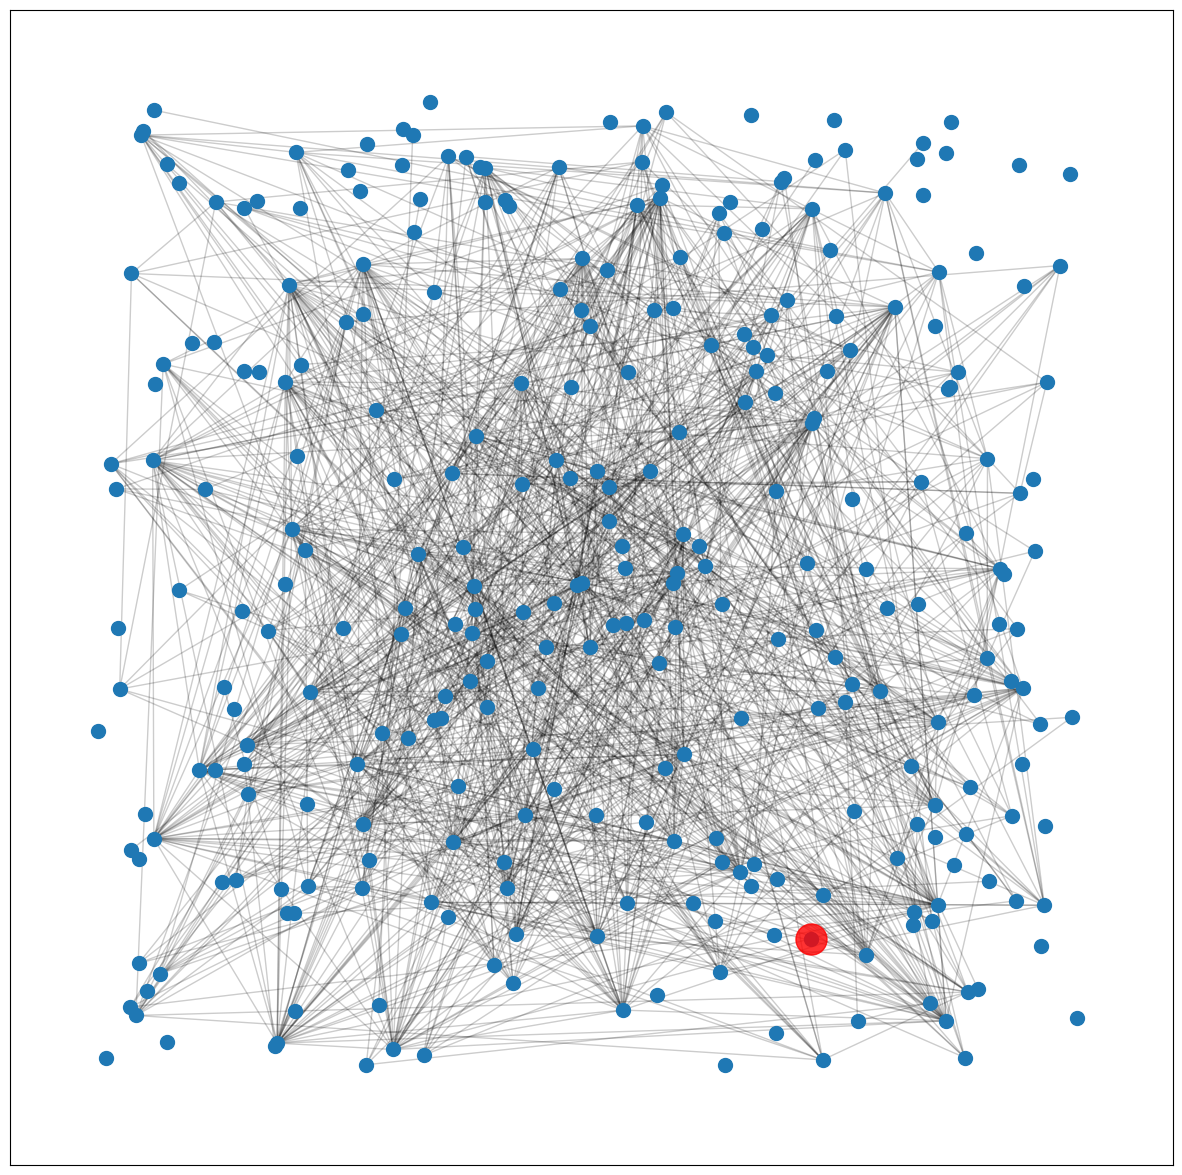

In [29]:
pos = nx.random_layout(graph)
cmap = cm.get_cmap('tab20', max(partition_library.values()) + 1)
plt.figure(figsize=(15, 15))

largest_community = max(partition_library, key=partition_library.get)

nx.draw_networkx_nodes(graph, pos, node_size=100)
nx.draw_networkx_edges(graph, pos, alpha=0.2)
nx.draw_networkx_nodes(graph, nodelist=[largest_community], node_size=500, pos=pos, node_color='red',alpha=0.8)

plt.show()
